# Redução de Dimensionalidade

Túlio Ribeiro

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

## Nível 1 - Exploração do dado

### 1. Análise A

In [2]:
df1 = pd.read_csv('dataset/DESCRITORESMATH.csv')
df1 = df1.reindex(sorted(df1.columns), axis=1)

In [3]:
df1.head()

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D64,D65,D67,D71,D72,D76,D78,Escola,Indicação do Padrão de Desempenho,Município
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,25.4,27.5,22.8,25.4,28.1,86.4,25.5,LIA SIDOU EEM,Crítico,AQUIRAZ
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,15.0,22.4,20.3,32.7,21.2,86.2,26.0,EEM LIA SIDOU,Crítico,AQUIRAZ
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,33.3,25.4,23.4,17.0,37.1,74.6,40.3,EEM LIA SIDOU,Crítico,AQUIRAZ
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,37.1,28.4,23.5,12.2,28.9,93.8,50.0,LIA SIDOU EEMTI,Crítico,AQUIRAZ
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,21.0,27.2,20.0,17.6,32.1,82.3,15.1,EEFM DOM ALOISIO LORSCHEIDER,Muito Crítico,CAUCAIA


#### 1.1 Número total de atributos e instâncias

In [4]:
print('O dataframe possui um total de ' + str(df1.shape[1]) + ' atributos' + ' e de ' + str(df1.shape[0]) + ' instâncias')

O dataframe possui um total de 27 atributos e de 2472 instâncias


#### 1.2 Quais variáveis são numéricas? Quais são categóricas?

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   D16                                2472 non-null   float64
 1   D19                                2472 non-null   float64
 2   D20                                2472 non-null   float64
 3   D24                                2472 non-null   float64
 4   D28                                2472 non-null   float64
 5   D40                                2472 non-null   float64
 6   D42                                2472 non-null   float64
 7   D49                                2472 non-null   float64
 8   D50                                2472 non-null   float64
 9   D51                                2472 non-null   float64
 10  D52                                2472 non-null   float64
 11  D53                                2472 non-null   float

Dentre os 27 atributos, 24 são do tipo númerico (float64) e 3 são do tipo categórico (object)

#### 1.3 Distribuição da variável Indicação do Padrão de Desempenho

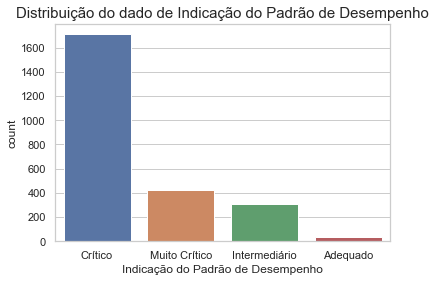

In [6]:
sns.countplot(df1['Indicação do Padrão de Desempenho'])
plt.title('Distribuição do dado de Indicação do Padrão de Desempenho', fontdict={'fontsize':15})
plt.show()

Por meio de uma análise inicial, o dado de Indicação do Padrão de Desempenho apresenta-se bastante desbalanceado, onde as ocorrências concentram-se no "Crítico", enquanto as demais dividem-se entre "Muito crítico", "Intermediário" e "Adequado".

#### 1.4 Frequência com que cada escola aparece no dado

In [7]:
df1['Escola'].value_counts()

EEM GOVERNADOR ADAUTO BEZERRA                 20
EEM FILGUEIRAS LIMA                            8
EEM PLACIDO ADERALDO CASTELO                   8
ALMIR PINTO EEM                                8
PATATIVA DO ASSARE EEM                         7
                                              ..
CORNELIO DIOGENES EEMTI                        1
HUET ARRUDA EEM                                1
EEM PROFESSORA MARIA AFONSINA DINIZ MACEDO     1
CUSTODIO DA SILVA LEMOS EEMTI                  1
LIA SIDOU EEM                                  1
Name: Escola, Length: 763, dtype: int64

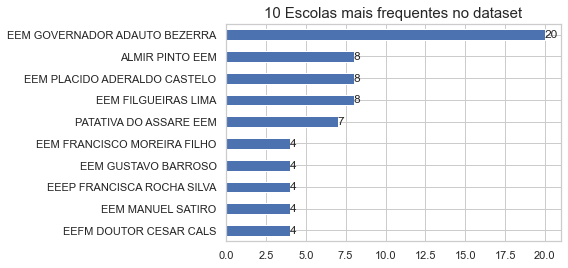

In [8]:
ax = df1['Escola'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)
plt.title('10 Escolas mais frequentes no dataset', fontdict={'fontsize':15})
plt.show()

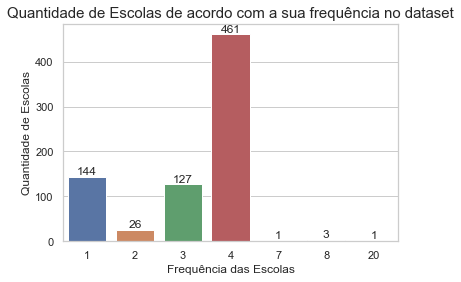

In [9]:
ax = sns.countplot(df1['Escola'].value_counts())
for i in ax.containers:
    ax.bar_label(i)
plt.title('Quantidade de Escolas de acordo com a sua frequência no dataset', fontdict={'fontsize':15})
plt.xlabel('Frequência das Escolas')
plt.ylabel('Quantidade de Escolas')
plt.show()

461 escolas aparecem 4 vezes no dataset.

#### 1.5 Frequência com que cada município aparece no dado

In [10]:
df1['Município'].value_counts()

FORTALEZA            608
CAUCAIA               64
MARACANAU             64
SOBRAL                64
JUAZEIRO DO NORTE     56
                    ... 
JAGUARIBARA            4
PINDORETAMA            4
PALMACIA               4
BARREIRA               4
BANABUIU               4
Name: Município, Length: 183, dtype: int64

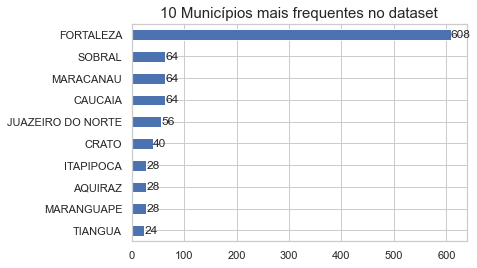

In [11]:
ax = df1['Município'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)
plt.title('10 Municípios mais frequentes no dataset', fontdict={'fontsize':15})
plt.show()

Fortaleza é o munícipio com maior frequência no dataset seguido por Sobral, Maracanaú e Caucaia, os quais possuem a mesma frequência.

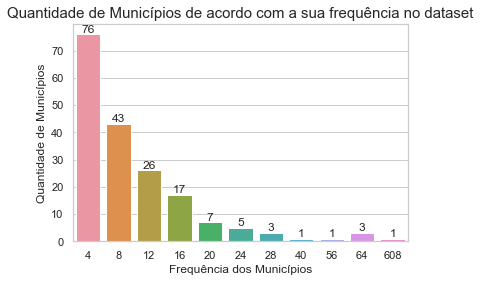

In [12]:
ax = sns.countplot(df1['Município'].value_counts())
for i in ax.containers:
    ax.bar_label(i)
plt.title('Quantidade de Municípios de acordo com a sua frequência no dataset', fontdict={'fontsize':15})
plt.xlabel('Frequência dos Municípios')
plt.ylabel('Quantidade de Municípios')
plt.show()

Percebe-se que 76 municípios (41%) aparecem 4 vezes no dataset e que apenas 1 município aparece 608 vezes.

#### 1.6 Existe alguma relação linear entre os descritores?

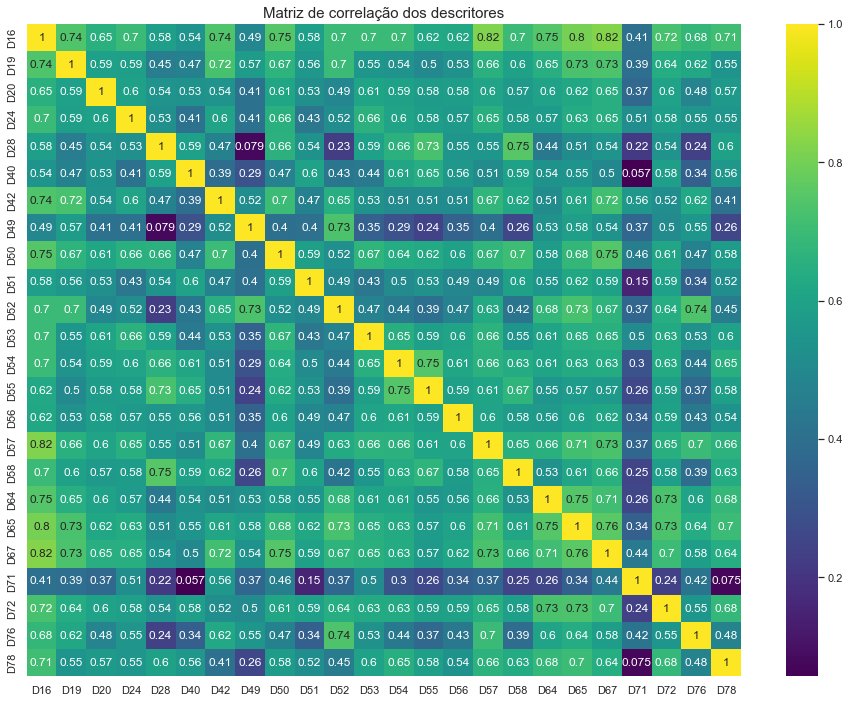

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(df1.corr(), annot=True, cmap='viridis')
plt.title('Matriz de correlação dos descritores', fontdict={'fontsize':15})
plt.show()

Pares com correlação linear maior que 0,80<br>
D16 x D57, D65, D67

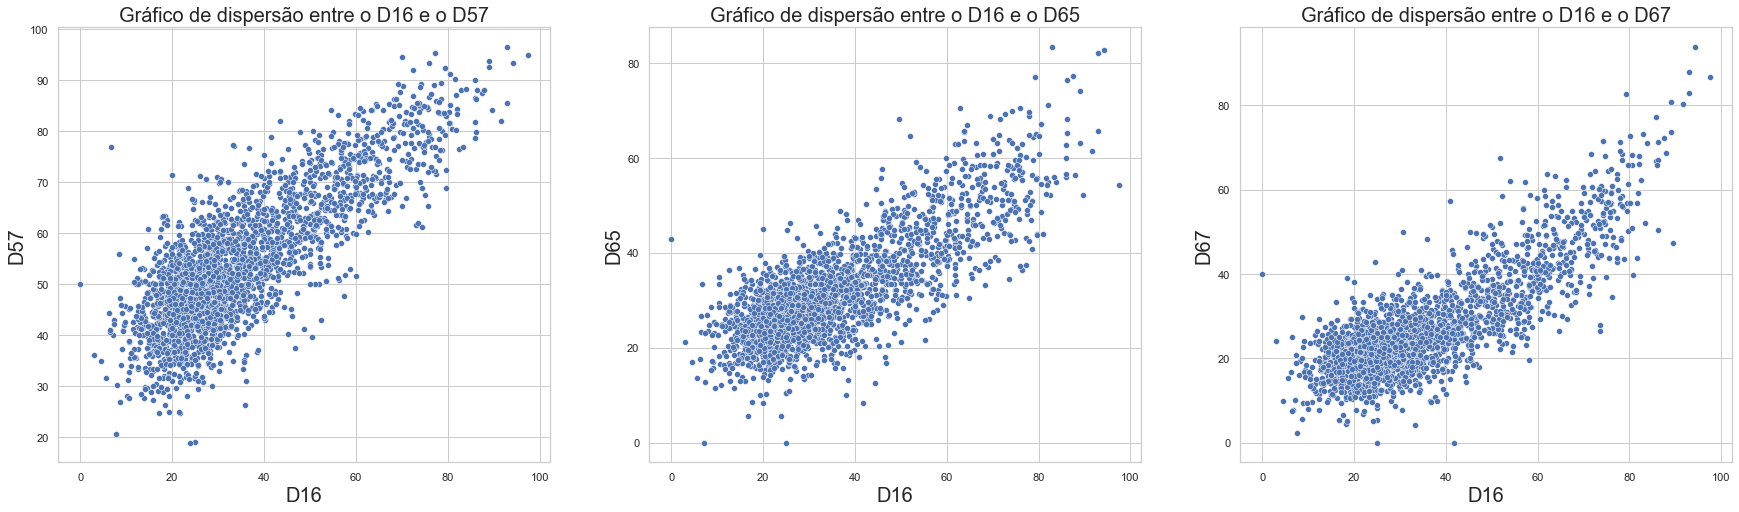

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30,8))

font = {'size' : 20}
plt.rc('font', **font)

g1 = sns.scatterplot(data=df1, x='D16', y='D57', ax=ax1)
g1.set_title('Gráfico de dispersão entre o D16 e o D57', **font)
g1.set_xlabel('D16', **font)
g1.set_ylabel('D57', **font)

g2 = sns.scatterplot(data=df1, x='D16', y='D65', ax=ax2)
g2.set_title('Gráfico de dispersão entre o D16 e o D65', **font)
g2.set_xlabel('D16', **font)
g2.set_ylabel('D65', **font)

g3 = sns.scatterplot(data=df1, x='D16', y='D67', ax=ax3)
g3.set_title('Gráfico de dispersão entre o D16 e o D67', **font)
g3.set_xlabel('D16', **font)
g3.set_ylabel('D67', **font)

plt.show()

### 2. Análise B

TEMA I. INTERAGINDO COM NÚMEROS E FUNÇÕES<br>
D16 D19 D20 D24 D28 D40 D42

TEMA II. CONVIVENDO COM A GEOMETRIA<br>
D49 D50 D51 D52 D53 D54 D55 D56 D57 D58

TEMA III. VIVENCIANDO AS MEDIDAS<br>
D64 D65 D67 D71 D72

TEMA IV. TRATAMENTO DA INFORMAÇÃO<br>
D76 D78

In [15]:
# Criar nova coluna com média dos descritores de acordo com seu respectivo tema
df2 = df1.iloc[:,24:]
df2['TEMA_I'] = df1[['D16', 'D19', 'D20', 'D24', 'D28', 'D40', 'D42']].mean(axis=1) 
df2['TEMA_II'] = df1[['D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58']].mean(axis=1) 
df2['TEMA_III'] = df1[['D64', 'D65', 'D67', 'D71', 'D72']].mean(axis=1) 
df2['TEMA_IV'] = df1[['D76', 'D78']].mean(axis=1) 

In [16]:
df2

,Escola,Indicação do Padrão de Desempenho,Município,TEMA_I,TEMA_II,TEMA_III,TEMA_IV
0,LIA SIDOU EEM,Crítico,AQUIRAZ,26.485714,27.58,25.84,55.95
1,EEM LIA SIDOU,Crítico,AQUIRAZ,23.800000,27.06,22.32,56.10
2,EEM LIA SIDOU,Crítico,AQUIRAZ,32.100000,30.68,27.24,57.45
3,LIA SIDOU EEMTI,Crítico,AQUIRAZ,28.785714,36.62,26.02,71.90
4,EEFM DOM ALOISIO LORSCHEIDER,Muito Crítico,CAUCAIA,21.471429,29.76,23.58,48.70
...,...,...,...,...,...,...,...
2467,EEM LICEU DO CONJUNTO CEARA,Crítico,FORTALEZA,28.271429,30.00,28.44,68.40
2468,EEF SAO JOSE DO PICI DAS PEDREIRAS,Crítico,FORTALEZA,30.400000,25.80,29.98,66.30
2469,EEF SAO JOSE DO PICI DAS PEDREIRAS,Crítico,FORTALEZA,22.942857,25.99,22.56,54.60
2470,EEF SAO JOSE DO PICI DAS PEDREIRAS,Crítico,FORTALEZA,35.300000,29.72,21.18,57.95


In [17]:
df2.describe()

,TEMA_I,TEMA_II,TEMA_III,TEMA_IV
count,2472.000000,2472.000000,2472.000000,2472.000000
mean,30.432969,31.880562,27.856011,59.407625
std,9.525556,7.831030,8.344701,9.343189
min,10.614286,17.150000,1.660000,32.600000
25%,24.057143,26.910000,22.460000,52.800000
50%,27.335714,29.380000,25.260000,57.650000
75%,34.032143,34.345000,30.535000,64.950000
max,86.114286,83.200000,78.240000,93.000000


#### 2.1 Principais municípios com maiores médias por escola em relação ao TEMA I 

In [18]:
tema1 = df2.sort_values(by=['TEMA_I'], ascending=False)[['Escola', 'Município', 'TEMA_I']]
tema1 = tema1.drop_duplicates(subset=['Escola'], keep='first')
tema1

,Escola,Município,TEMA_I
349,EEEP ADRIANO NOBRE,ITAPAJE,86.114286
334,EEEP JULIO FRANCA,BELA CRUZ,74.057143
1375,EEEP PROFESSOR WALQUER CAVALCANTE MAIA,RUSSAS,73.971429
1765,EEEP PROFESSORA LYSIA PIMENTEL GOMES SAMPAIO S...,SOBRAL,72.300000
1462,EEEP JOSE VIDAL ALVES,CANINDE,70.271429
...,...,...,...
7,EEM DOM ALOISIO LORSCHEIDER,CAUCAIA,19.871429
231,ROTARY CLUB SAO MIGUEL EEMTI,CAUCAIA,19.857143
2131,EEMTI WALDEMAR FALCAO,FORTALEZA,19.800000
1259,CASIMIRO LEITE DE OLIVEIRA EEMTI,PACATUBA,19.442857


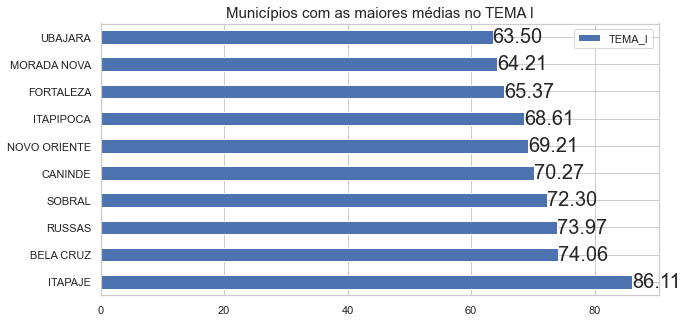

In [19]:
ax = tema1[:10].plot(kind='barh', figsize=(10,5))
ax.set_yticklabels(tema1['Município'].values[:10])
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.title('Municípios com as maiores médias no TEMA I', fontdict={'fontsize':15})
plt.show()

In [20]:
#  nota média de cada município em relação ao TEMA I
m1 = list(tema1['TEMA_I'])
m1[:10]

[86.11428571428573,
 74.05714285714285,
 73.97142857142856,
 72.3,
 70.27142857142857,
 69.21428571428571,
 68.61428571428571,
 65.37142857142858,
 64.21428571428571,
 63.5]

#### 2.2 Principais municípios com maiores médias por escola em relação ao TEMA II

In [21]:
tema2 = df2.sort_values(by=['TEMA_II'], ascending=False)[['Escola', 'Município', 'TEMA_II']]
tema2 = tema2.drop_duplicates(subset=['Escola'], keep='first')
tema2

,Escola,Município,TEMA_II
349,EEEP ADRIANO NOBRE,ITAPAJE,83.20
1765,EEEP PROFESSORA LYSIA PIMENTEL GOMES SAMPAIO S...,SOBRAL,76.40
1375,EEEP PROFESSOR WALQUER CAVALCANTE MAIA,RUSSAS,72.66
128,EEEP GOVERNADOR WALDEMAR ALCANTARA,UBAJARA,68.24
611,EEEP MARIA EUDES BEZERRA VERAS,NOVO ORIENTE,67.89
...,...,...,...
1259,CASIMIRO LEITE DE OLIVEIRA EEMTI,PACATUBA,23.84
1155,EEMTI PROFESSORA BALBINA JUCA DE ALBUQUERQUE,FORTALEZA,23.79
927,DESEMBARGADOR RAIMUNDO CARVALHO LIMA EEMTI,PACATUBA,23.26
231,ROTARY CLUB SAO MIGUEL EEMTI,CAUCAIA,22.32


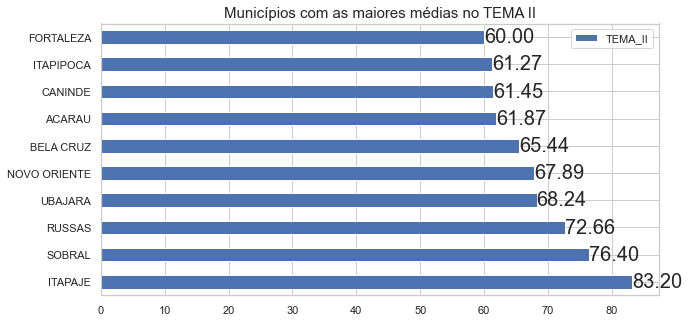

In [22]:
ax = tema2[:10].plot(kind='barh', figsize=(10,5))
ax.set_yticklabels(tema2['Município'].values[:10])
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.title('Municípios com as maiores médias no TEMA II', fontdict={'fontsize':15})
plt.show()

In [23]:
# nota média de cada município em relação ao TEMA II
m2 = list(tema2['TEMA_II'])
m2[:10]

[83.2,
 76.4,
 72.66,
 68.24000000000001,
 67.89,
 65.44,
 61.86999999999999,
 61.45,
 61.269999999999996,
 59.999999999999986]

#### 2.3 Principais municípios com maiores médias por escola em relação ao TEMA III

In [24]:
tema3 = df2.sort_values(by=['TEMA_III'], ascending=False)[['Escola', 'Município', 'TEMA_III']]
tema3 = tema3.drop_duplicates(subset=['Escola'], keep='first')
tema3

,Escola,Município,TEMA_III
349,EEEP ADRIANO NOBRE,ITAPAJE,78.24
1767,EEEP PROFESSORA LYSIA PIMENTEL GOMES SAMPAIO S...,SOBRAL,71.74
1375,EEEP PROFESSOR WALQUER CAVALCANTE MAIA,RUSSAS,69.02
1463,EEEP JOSE VIDAL ALVES,CANINDE,64.64
47,EEEP FLAVIO GOMES GRANJEIRO,PARAIPABA,62.74
...,...,...,...
2427,EEFM CENTRO EDUCACIONAL DOM HELIO CAMPOS,FORTALEZA,19.30
927,DESEMBARGADOR RAIMUNDO CARVALHO LIMA EEMTI,PACATUBA,17.82
2235,MIRIAN PORTO MOTA EEMTI,FORTALEZA,17.62
2439,EEMTI PROFESSOR CORONEL JOSE AURELIO CAMARA,FORTALEZA,17.00


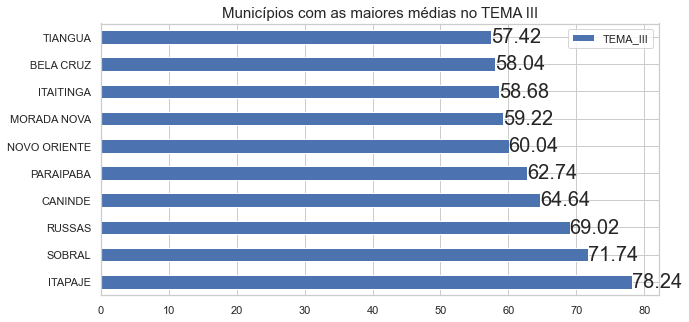

In [25]:
ax = tema3[:10].plot(kind='barh', figsize=(10,5))
ax.set_yticklabels(tema3['Município'].values[:10])
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.title('Municípios com as maiores médias no TEMA III', fontdict={'fontsize':15})
plt.show()

In [26]:
# nota média de cada município em relação ao TEMA III
m3 = list(tema3['TEMA_III'])
m3[:10]

[78.24000000000001,
 71.74,
 69.02,
 64.63999999999999,
 62.739999999999995,
 60.04,
 59.21999999999999,
 58.67999999999999,
 58.040000000000006,
 57.419999999999995]

#### 2.4 Principais municípios com maiores médias por escola em relação ao TEMA IV

In [27]:
tema4 = df2.sort_values(by=['TEMA_IV'], ascending=False)[['Escola', 'Município', 'TEMA_IV']]
tema4 = tema4.drop_duplicates(subset=['Escola'], keep='first')
tema4

,Escola,Município,TEMA_IV
1375,EEEP PROFESSOR WALQUER CAVALCANTE MAIA,RUSSAS,93.00
351,EEEP ADRIANO NOBRE,ITAPAJE,92.25
855,EEEP PROFESSOR SEBASTIAO VASCONCELOS SOBRINHO,TIANGUA,92.10
1767,EEEP PROFESSORA LYSIA PIMENTEL GOMES SAMPAIO S...,SOBRAL,92.05
1463,EEEP JOSE VIDAL ALVES,CANINDE,90.00
...,...,...,...
230,EEFM ROTARY CLUB SAO MIGUEL,CAUCAIA,47.95
1631,RAIMUNDO ADJACIR CIDRAO DE OLIVEIRA EEM,TAUA,47.30
1624,DEILMA SIQUEIRA DE ALENCAR ALMEIDA EEM,PARAMBU,46.95
1721,PROFESSORA MARIA AFONSINA DINIZ MACEDO EEM,VARZEA ALEGRE,46.55


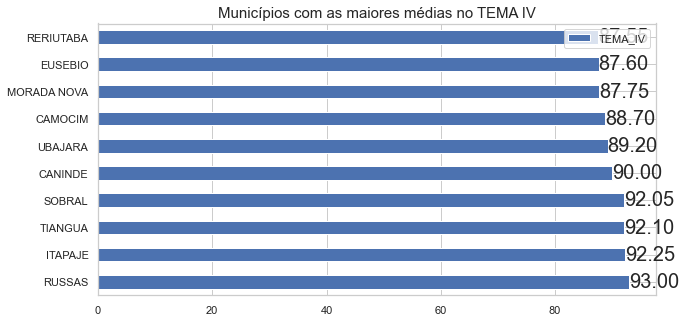

In [28]:
ax = tema4[:10].plot(kind='barh', figsize=(10,5))
ax.set_yticklabels(tema4['Município'].values[:10])
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.title('Municípios com as maiores médias no TEMA IV', fontdict={'fontsize':15})
plt.show()

In [29]:
# nota média de cada município em relação ao TEMA IV
m4 = list(tema4['TEMA_IV'])
m4[:10]

[93.0, 92.25, 92.1, 92.05, 90.0, 89.2, 88.7, 87.75, 87.6, 87.55]

In [30]:
list(set(tema1['Município'][:10]) & set(tema2['Município'][:10]) & set(tema3['Município'][:10]) & set(tema4['Município'][:10]))

['SOBRAL', 'RUSSAS', 'CANINDE', 'ITAPAJE']

Os municípios CANINDE, ITAPAJE, RUSSAS, SOBRAL aparecem entre os 10 municípios com as melhores médias nos quatro temas.

#### 2.5 Dataframe com m1, m2, m3 e m4

In [31]:
d = {'TEMA_I': m1, 'TEMA_II': m2, 'TEMA_III': m3, 'TEMA_IV': m4}
df_temas = pd.DataFrame(data=d)
df_temas

,TEMA_I,TEMA_II,TEMA_III,TEMA_IV
0,86.114286,83.20,78.24,93.00
1,74.057143,76.40,71.74,92.25
2,73.971429,72.66,69.02,92.10
3,72.300000,68.24,64.64,92.05
4,70.271429,67.89,62.74,90.00
...,...,...,...,...
758,19.871429,23.84,19.30,47.95
759,19.857143,23.79,17.82,47.30
760,19.800000,23.26,17.62,46.95
761,19.442857,22.32,17.00,46.55


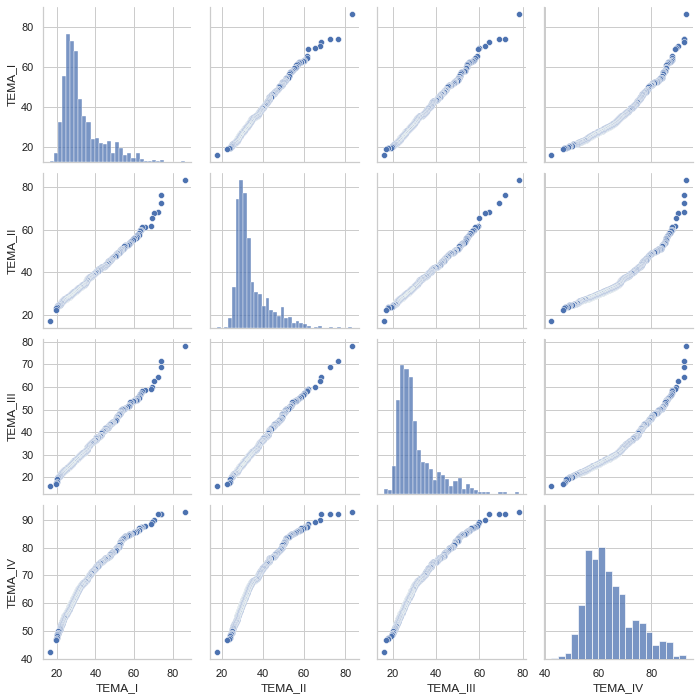

In [32]:
sns.pairplot(df_temas)

In [33]:
df_temas.corr()

,TEMA_I,TEMA_II,TEMA_III,TEMA_IV
TEMA_I,1.000000,0.997546,0.999009,0.976142
TEMA_II,0.997546,1.000000,0.998378,0.965784
TEMA_III,0.999009,0.998378,1.000000,0.973202
TEMA_IV,0.976142,0.965784,0.973202,1.000000


A partir dos gráficos gerados pelo pairplot e pela matriz de correlação, é possível identificar que os temas possuem uma correlação linear positiva.

Observa-se que os temas I, II e III possuem uma maior correlação linear em comparação ao tema IV que, apesar disso, ainda apresenta uma correlação alta, isto é, próxima de 1.

## Nível 2 - Métodos de redução de dimensionalidade em relação a performance dos modelos de Machine Learning (ML)

Importância dos métodos de redução de dimensionalidade em relação a performance dos modelos de Machine Learning (ML). Utilizaremos os descritores do dataframe df1 para prever a **Indicação do Padrão de Desempenho**

In [34]:
# Transformação das categorias (string) da Indicação do Padrão de Desempenho para valor númerico (int)
desempenho = dict(zip(df1['Indicação do Padrão de Desempenho'].unique(), \
                      range(len(df1['Indicação do Padrão de Desempenho'].unique())))
                  )
desempenho

{'Crítico': 0, 'Muito Crítico': 1, 'Intermediário': 2, 'Adequado': 3}

In [35]:
desempenho.update({'Crítico': 1, 'Muito Crítico': 0})
desempenho

{'Crítico': 1, 'Muito Crítico': 0, 'Intermediário': 2, 'Adequado': 3}

In [36]:
# Adição da coluna TARGET, a qual representa a variável alvo e a 'Indicação do Padrão de Desempenho' em formato númerico 
df_numeric = df1.loc[:,:'D78']
df_numeric['TARGET'] = df1['Indicação do Padrão de Desempenho'].apply(lambda x: desempenho[x])
df_numeric

,D16,D19,D20,D24,D28,D40,D42,D49,D50,D51,...,D57,D58,D64,D65,D67,D71,D72,D76,D78,TARGET
0,33.1,33.8,20.0,29.6,6.4,25.5,37.0,38.3,21.6,23.3,...,50.7,16.7,25.4,27.5,22.8,25.4,28.1,86.4,25.5,1
1,24.0,30.9,20.7,19.1,13.6,10.7,47.6,20.4,25.5,22.8,...,45.2,16.5,15.0,22.4,20.3,32.7,21.2,86.2,26.0,1
2,30.2,31.9,23.8,25.5,33.3,38.7,41.3,19.0,17.5,16.1,...,69.8,27.0,33.3,25.4,23.4,17.0,37.1,74.6,40.3,1
3,37.1,34.1,19.8,26.1,23.3,26.9,34.2,35.3,20.2,25.8,...,68.1,29.5,37.1,28.4,23.5,12.2,28.9,93.8,50.0,1
4,12.4,36.1,19.7,10.2,13.6,24.6,33.7,40.6,25.2,29.6,...,41.7,22.2,21.0,27.2,20.0,17.6,32.1,82.3,15.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,43.5,38.0,24.5,25.4,14.4,14.7,37.4,27.6,24.0,27.6,...,52.9,25.6,36.5,30.9,29.5,17.8,27.5,84.1,52.7,1
2468,21.9,37.5,16.0,34.6,16.7,26.1,60.0,34.1,27.9,21.2,...,35.5,12.1,33.3,35.0,16.7,35.5,29.4,90.9,41.7,1
2469,28.8,27.1,16.1,19.1,16.4,4.8,48.3,26.2,21.7,13.6,...,51.6,20.0,35.0,20.6,18.3,20.9,18.0,85.5,23.7,1
2470,40.9,40.9,17.2,31.8,29.2,46.7,40.4,17.8,25.8,23.3,...,60.2,29.0,35.3,18.0,15.1,10.0,27.5,77.4,38.5,1


## 1. Eliminação por variância

Verificação do comportamento das métricas de avaliação em relação a quantidade de atributos inseridos no modelo de ML utilizando a **eliminação por variância**

In [37]:
# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
df_num_transf = pd.DataFrame(data=scaler.fit_transform(df_numeric.drop('TARGET',axis=1)),
                                                       columns=df_numeric.drop('TARGET',axis=1).columns)

In [39]:
df_num_transf['TARGET'] = df_numeric['TARGET'].copy()

In [40]:
df_var = pd.DataFrame(data=df_num_transf, columns=df_numeric.drop('TARGET',axis=1).columns).var().sort_values(ascending=False)
df_var

D16    0.029767
D42    0.028833
D57    0.028248
D76    0.023600
D78    0.020698
D71    0.020541
D40    0.020190
D52    0.019969
D58    0.017808
D65    0.017124
D19    0.015908
D67    0.015846
D72    0.014860
D28    0.014752
D24    0.014490
D64    0.013721
D49    0.012978
D50    0.012695
D54    0.012683
D55    0.012091
D51    0.011728
D53    0.011691
D56    0.011247
D20    0.008057
dtype: float64

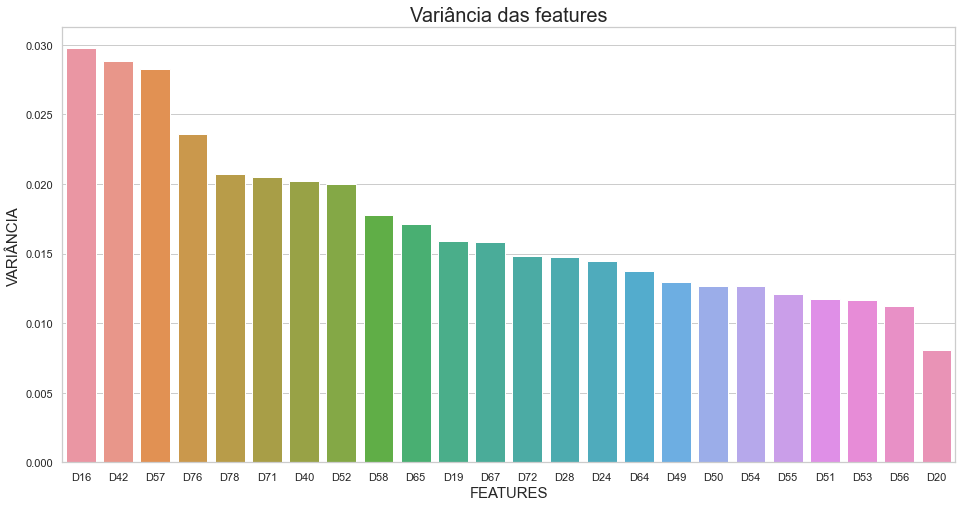

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(x=df_var.index, y=df_var.values, order=df_var.index)
plt.title('Variância das features', fontdict={'fontsize':20})
plt.xlabel('FEATURES', fontsize=15)
plt.ylabel('VARIÂNCIA', fontsize=15)
plt.show()

Observa-se pela Figura acima que a feature D16 apresenta a maior variância e que a feature D20 apresenta a menor variância. 

Ressalta-se que esse método de engenharia de features objetiva remover as variáveis que apresentam menor variância, visto que as features com maior variância são mais importantes para a acurácia do modelo.

In [42]:
featuressorted = df_var.index

In [43]:
# Features organizadas de acordo com sua variância
featuressorted

Index(['D16', 'D42', 'D57', 'D76', 'D78', 'D71', 'D40', 'D52', 'D58', 'D65',
       'D19', 'D67', 'D72', 'D28', 'D24', 'D64', 'D49', 'D50', 'D54', 'D55',
       'D51', 'D53', 'D56', 'D20'],
      dtype='object')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [45]:
# Loop para processar todas as combinações de features no modelo
ncols_s = []
acu_s = []
f1s_s = []


for i in range(1, len(featuressorted) + 1):

    X = df_num_transf[featuressorted[0:i]]
    y = df_num_transf['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = LogisticRegression(random_state=42, max_iter=10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acu_s.append(accuracy_score(y_test, y_pred))
    f1s_s.append(f1_score(y_test, y_pred, average=None))

    ncols_s.append(i)

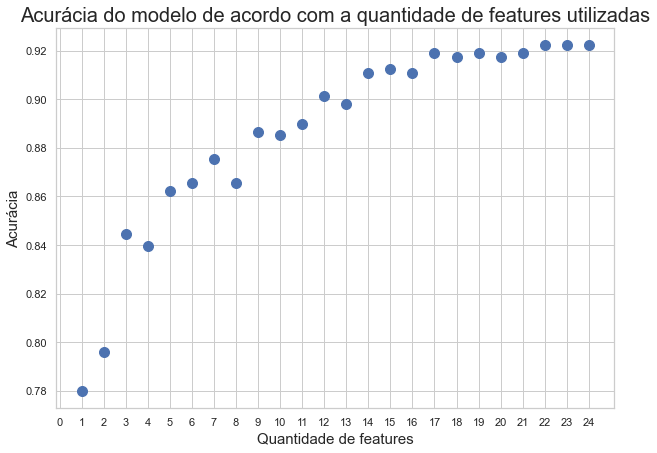

In [46]:
plt.figure(figsize=(10,7))
plt.title('Acurácia do modelo de acordo com a quantidade de features utilizadas', fontdict={'fontsize':20})
plt.xlabel('Quantidade de features', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.xticks(np.arange(0, 25, step=1))
plt.scatter(ncols_s, acu_s, s=100)

Na figura acima percebe-se que o modelo tem acurácia menor que 86% com a utilização de até 4 features ('D16', 'D42', 'D57', 'D76') e que esse valor aumenta de acordo com o acréscimo de features. A partir de 14 features a acurácia não apresenta um aumento relevante e atinge seu valor máximo de 92% com 22 features.

Destaca-se que a acurácia se mantém estável mesmo após o acréscismo das duas últimas features ('D56', 'D20').

Dessa forma, o modelo apresentou a melhor acurácia utilizando 22 features organizadas pela variância em ordem descrescente, quais sejam: 'D16', 'D42', 'D57', 'D76', 'D78', 'D71', 'D40', 'D52', 'D58', 'D65', 'D19', 'D67', 'D72', 'D28', 'D24', 'D64', 'D49', 'D50', 'D54', 'D55', 'D51', 'D53'.

In [47]:
featuressorted[0:22]

Index(['D16', 'D42', 'D57', 'D76', 'D78', 'D71', 'D40', 'D52', 'D58', 'D65',
       'D19', 'D67', 'D72', 'D28', 'D24', 'D64', 'D49', 'D50', 'D54', 'D55',
       'D51', 'D53'],
      dtype='object')

In [48]:
X = df_numeric[featuressorted[0:22]]
y = df_numeric['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [49]:
print('Acurácia do modelo utilizando 19 features: ' + str(accuracy_score(y_test, y_pred)))
print('F1 Score do modelo utilizando 19 features: ' + str(f1_score(y_test, y_pred, average=None)))

Acurácia do modelo utilizando 19 features: 0.9288025889967637
F1 Score do modelo utilizando 19 features: [0.85853659 0.95303551 0.9        0.77777778]


## 2. Método de eliminação por árvore

Verificação do comportamento das métricas de avaliação em relação a quantidade de atributos inseridos no modelo de ML utilizando a **método de eliminação por árvore**

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rdf = RandomForestClassifier(random_state=42)
rdf.fit(df_num_transf.drop('TARGET', axis=1), df_num_transf['TARGET'])

RandomForestClassifier(random_state=42)

In [52]:
colunas = df_num_transf.drop('TARGET', axis=1)
df_rdf = pd.DataFrame(data=rdf.feature_importances_, index=colunas.columns)

In [53]:
df_rdf = df_rdf.sort_values(by=0, ascending=False)
df_rdf.rename(columns = {0:'Importancia'}, inplace = True)
df_rdf

,Importancia
D16,0.152761
D57,0.120918
D50,0.069417
D67,0.065292
D65,0.064626
D58,0.048539
D78,0.048507
D76,0.047813
D72,0.043915
D42,0.040439


In [54]:
featuressorted_rdf = df_rdf.index
featuressorted_rdf

Index(['D16', 'D57', 'D50', 'D67', 'D65', 'D58', 'D78', 'D76', 'D72', 'D42',
       'D28', 'D19', 'D64', 'D52', 'D53', 'D55', 'D54', 'D20', 'D40', 'D24',
       'D56', 'D51', 'D71', 'D49'],
      dtype='object')

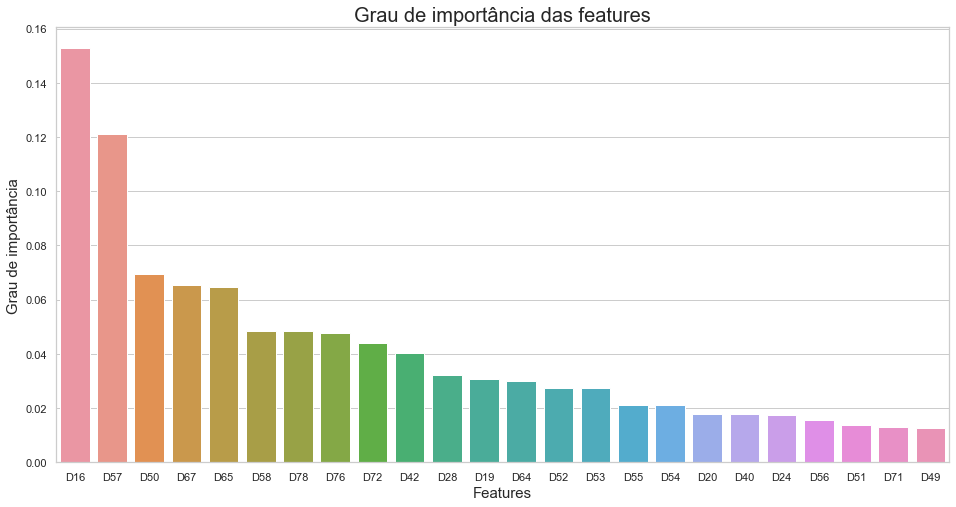

In [55]:
plt.figure(figsize=(16,8))
sns.barplot(x=df_rdf.index, y=df_rdf.values.flatten())
plt.title('Grau de importância das features', fontdict={'fontsize':20})
plt.xlabel('Features', fontsize=15)
plt.ylabel('Grau de importância', fontsize=15)
plt.show()

In [56]:
# Loop para processar todas as combinações de features no modelo
ncols_rdf = []
acu_rdf = []
f1s_rdf = []


for i in range(1, len(featuressorted_rdf) + 1):

    X = df_num_transf[featuressorted_rdf[0:i]]
    y = df_num_transf['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = LogisticRegression(random_state=42, max_iter=10000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acu_rdf.append(accuracy_score(y_test, y_pred))
    f1s_rdf.append(f1_score(y_test, y_pred, average=None))

    ncols_rdf.append(i)

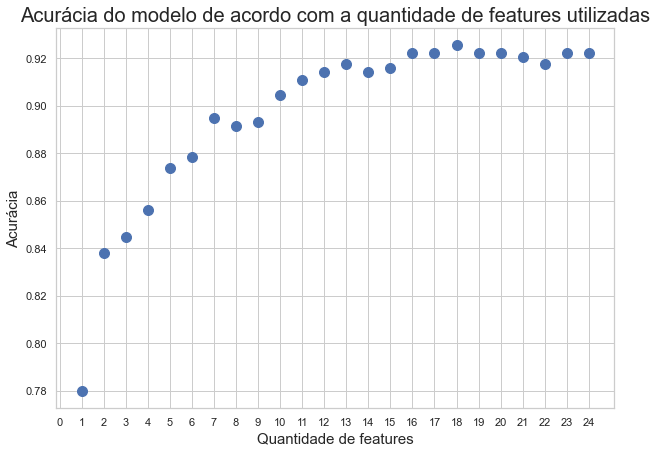

In [57]:
plt.figure(figsize=(10,7))
plt.title('Acurácia do modelo de acordo com a quantidade de features utilizadas', fontdict={'fontsize':20})
plt.xlabel('Quantidade de features', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.xticks(np.arange(0, 25, step=1))
plt.scatter(ncols_rdf, acu_rdf, s=100)

O modelo tem acurácia menor com a utilização de 1 features ('D16') e que essa acurácia aumenta de acordo com o acréscimo de features, conforme a Figura acima. Contudo, a acurácia se estabiliza na faixa entre 0,90 e 0,93 a partir de 10 features e atinge seu valor máximo com 18 features.

O modelo apresentou a melhor acurácia utilizando 18 features organizadas pela variância em ordem descrescente, quais sejam: 'D16', 'D57', 'D50', 'D67', 'D65', 'D58', 'D78', 'D76', 'D72', 'D42', 'D28', 'D19', 'D64', 'D52', 'D53', 'D55', 'D54', 'D20'.

In [58]:
featuressorted_rdf[:18]

Index(['D16', 'D57', 'D50', 'D67', 'D65', 'D58', 'D78', 'D76', 'D72', 'D42',
       'D28', 'D19', 'D64', 'D52', 'D53', 'D55', 'D54', 'D20'],
      dtype='object')

In [59]:
X = df_num_transf[featuressorted_rdf[0:18]]
y = df_num_transf['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [60]:
print('Acurácia do modelo utilizando 11 features: ' + str(accuracy_score(y_test, y_pred)))
print('F1 Score do modelo utilizando 11 features: ' + str(f1_score(y_test, y_pred, average=None)))

Acurácia do modelo utilizando 11 features: 0.9255663430420712
F1 Score do modelo utilizando 11 features: [0.82162162 0.95439377 0.90780142 0.54545455]


## 3. PCA - Comportamento das métricas de avaliação em relação a quantidades de atributos

Verificação do comportamento das métricas de avaliação em relação a quantidade de atributos inseridos no modelo de ML utilizando o **PCA**

In [61]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [62]:
ncols_pca = []
acu_pca = []
f1s_pca = []


for i in range(1, len(df_numeric.drop('TARGET',axis=1).columns) + 1):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df_numeric.drop('TARGET',axis=1))
    y_pca = df_numeric['TARGET']
    
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, random_state=42)
    clf_pca = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 10), random_state=42, max_iter=3000)
    clf_pca.fit(X_train_pca, y_train_pca)
    y_pred_pca = clf_pca.predict(X_test_pca)
    
    acu_pca.append(accuracy_score(y_test_pca, y_pred_pca))
    f1s_pca.append(f1_score(y_test_pca, y_pred_pca, average=None))

    ncols_pca.append(i)

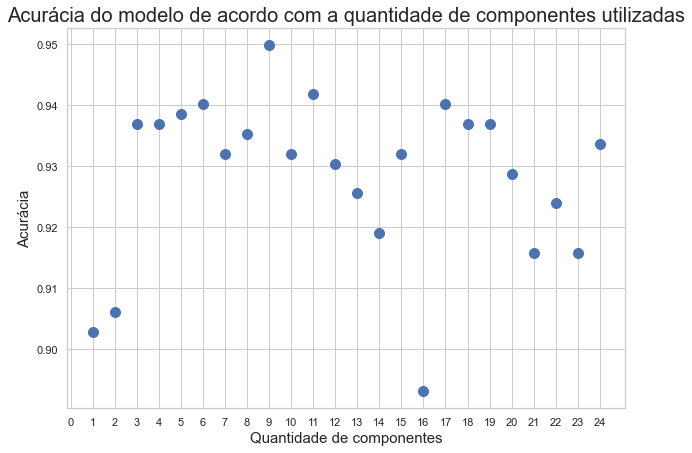

In [63]:
plt.figure(figsize=(10,7))
plt.title('Acurácia do modelo de acordo com a quantidade de componentes utilizadas', fontdict={'fontsize':20})
plt.xlabel('Quantidade de componentes', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.xticks(np.arange(0, 25, step=1))
plt.scatter(ncols_pca, acu_pca, s=100)

Os valores de acurácia são dispersos em relação à quantidade de componentes e que não há uma relação diretamente proporcional, conforme a Figura acima. O maior valor de acurácia foi obtido utilizando 9 componentes.

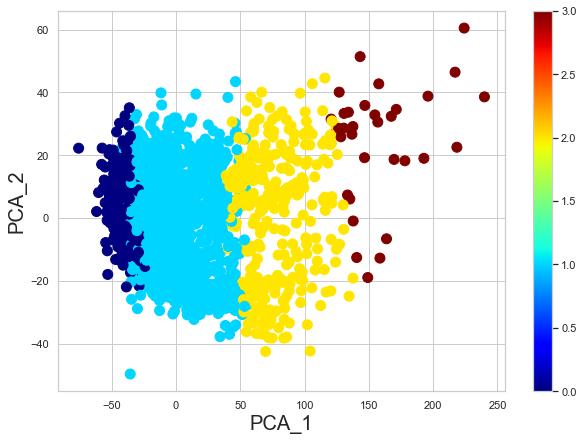

In [64]:
plt.figure(figsize=(10,7))
plt.xlabel('PCA_1', fontsize=20)
plt.ylabel('PCA_2', fontsize=20)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pca, s=100, cmap='jet')
plt.colorbar()

In [65]:
n_comp = 9
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(df_numeric.drop('TARGET',axis=1))
y_pca = df_numeric['TARGET']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, random_state=42)
clf_pca = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 10), random_state=42, max_iter=3000)
clf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = clf_pca.predict(X_test_pca)

In [66]:
print('Acurácia do modelo utilizando ' + str(n_comp) + ' componentes = ' + str(accuracy_score(y_test_pca, y_pred_pca)))

Acurácia do modelo utilizando 9 componentes = 0.9498381877022654


## 4. PCA - Comportamento da variância explicada como função do número de componentes principais

Verificação do comportamento da variância explicada como função do número de componentes principais utilizando o PCA.

In [67]:
ncomp = []
evr_all = []

# Loop para testar todas as componentes
for i in range(1, len(df_numeric.drop('TARGET',axis=1).columns) + 1):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df_numeric.drop('TARGET',axis=1))
    y_pca = df_numeric['TARGET']
      
    evr_all.append(sum(pca.explained_variance_ratio_))
    ncomp.append(i)

<BarContainer object of 24 artists>

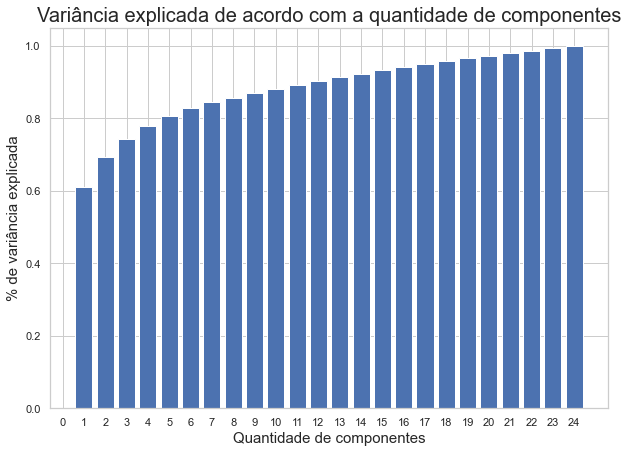

In [68]:
plt.figure(figsize=(10,7))
plt.title('Variância explicada de acordo com a quantidade de componentes', fontdict={'fontsize':20})
plt.xlabel('Quantidade de componentes', fontsize=15)
plt.ylabel('% de variância explicada', fontsize=15)
plt.xticks(np.arange(0, 25, step=1))
plt.bar(ncomp, evr_all)

5 componentes ou features explicam 80% do dado, conforme a Figura acima 

## 5. Comparação de todas as medições de performance

Comparação de todas as medições de performance observadas anteriormente

In [69]:
def annot_max(metodo, x, y, xbox, ybox, ax=None):
    xmax = x[np.argmax(y)]
    ymax = np.amax(y)
    text = metodo + '\n Features={:} \n Acurácia={:.3f}'.format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle='round, pad=0.3', fc='cyan', ec='b', lw=0.72)
    arrowprops = dict(arrowstyle='-', connectionstyle='angle3, angleA=90, angleB=0', color='black')
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="center", va="top")
    ax.annotate(text, xy=(xmax, ymax), size='12', xytext=(xbox, ybox), **kw)

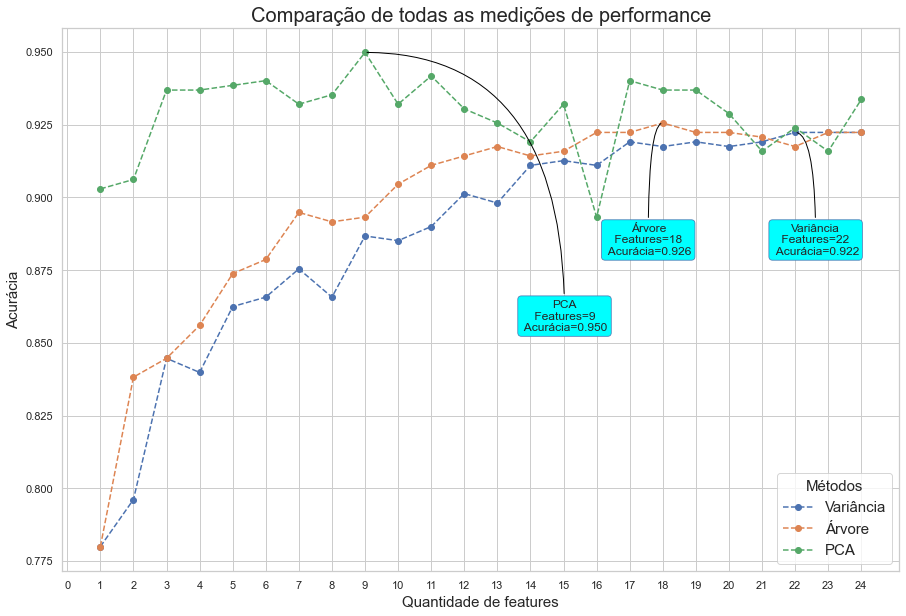

In [70]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(ncols_s, acu_s, 'o--', label='Variância')
annot_max('Variância', ncols_s, acu_s, 0.90, 0.64)

plt.plot(ncols_rdf, acu_rdf, 'o--', label = 'Árvore')
annot_max('Árvore', ncols_rdf, acu_rdf, 0.70, 0.64)

plt.plot(ncols_pca, acu_pca, 'o--', label = 'PCA')
annot_max('PCA', ncols_pca, acu_pca, 0.60, 0.50)

plt.title('Comparação de todas as medições de performance', fontdict={'fontsize':20})
plt.xlabel('Quantidade de features', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.xticks(np.arange(0, 25, step=1))
plt.legend(title='Métodos', title_fontsize=15, fontsize=15)

plt.show()

Após a análise dos três métodos de redução de dimensionalidade descritos neste trabalho, quais sejam: variância, árvore e PCA, conclui-se que o método PCA obteve a melhor acurácia (0,95) utilizando a menor quantidade de componentes (9), conforme a Figura acima.